<a href="https://colab.research.google.com/github/Pengchengzhi/Face-Alignment-DRF/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Initialize

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
path="/content/drive/My Drive/Face Alignment DRF"
os.chdir(path)
os.listdir(path)

['main.ipynb', 'data.py', 'network.py', 'solve.py', 'datasets']

In [4]:
import numpy as np
import torch
import imageio
import matplotlib.pyplot as plt
import argparse, os, sys
import cv2
from PIL import Image

In [ ]:
dataset_afw_path="/content/drive/My Drive/Face Alignment DRF/datasets/afw"

Dataset: 300W https://ibug.doc.ic.ac.uk/resources/300-W/

## 1.1 Data preparation

In [5]:
# https://github.com/musyoku/face-alignment-at-3000fps/blob/master/run/train.py

def load_annotations(directory):
	annotations = {}
	fs = os.listdir(directory)
	for filename in fs:
		if filename.endswith(".pts"):
			with open(os.path.join(directory, filename), "r") as f:
				annotation = f.read().strip().split("\n")
				#assert len(annotation) == 72
				landmarks = []
				for location_str in annotation[3:-1]:
					location = location_str.split(" ")
					landmarks.append((float(location[0]), float(location[1])))
				annotations[filename.replace(".pts", "")] = landmarks
	return annotations

In [8]:
annotations_afw = load_annotations(dataset_afw_path)

### 1.1.1 Test picture

In [9]:
afw_test_points = annotations_afw['1051618982_1']

In [11]:
afw_test_x = [afw_test_points[i][0]-400 for i in range(68)]
afw_test_y = [afw_test_points[i][1] for i in range(68)]

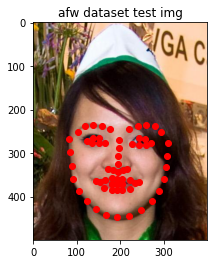

In [13]:
afw_test_img = Image.open(os.path.join(dataset_afw_path, '1051618982_1' + '.jpg'))

# crop
afw_test_img_array = np.array(afw_test_img)
afw_test_nimg_array = afw_test_img_array[0:500, 400:800]
afw_test_nimg = Image.fromarray(afw_test_nimg_array)

plt.figure("afw test") 
plt.imshow(afw_test_nimg)
plt.scatter(afw_test_x,afw_test_y,color='r')
plt.title('afw dataset test img') 
plt.show()

### 1.1.2 Data Washing <font color=red>(To be done)</font>

afw dataset contains pictures with whole human body, not only faces, so faces should be cropped into fixed size first. This dataset also contains pictures with multiple faces, so each should be matched with labels. 

Note that there are situations that a picture contain five faces but only three are labeled, so the number of cropped faces may be more than labels, should be carefully matched.
